In [1]:
import torch.nn as nn 
import torch.nn.functional as F 
import torch

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64) ## input, output 784 = 28 * 28
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 classification classes
    
    def forward(self, x):
        a1 = F.relu(self.fc1(x)) #!!!!
        a2 = F.relu(self.fc2(a1))
        a3 = F.relu(self.fc3(a2))
        z4 = self.fc4(a3)
        return F.log_softmax(z4, dim = 1)

In [8]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
X = torch.rand((28, 28))
X

tensor([[8.3849e-01, 7.4297e-01, 9.1346e-01, 2.1910e-01, 4.0498e-01, 7.8045e-01,
         2.3147e-02, 8.7407e-01, 9.5313e-01, 3.1396e-01, 9.1337e-01, 8.3221e-01,
         2.4770e-02, 3.9852e-01, 1.8513e-01, 8.7889e-01, 5.4242e-01, 9.6796e-01,
         8.1328e-01, 1.6283e-01, 7.7432e-01, 7.3776e-01, 8.8419e-03, 8.3184e-01,
         7.0445e-02, 1.7942e-01, 9.7417e-01, 2.3449e-01],
        [3.1746e-01, 2.4364e-01, 6.1771e-01, 6.1308e-01, 6.6406e-01, 2.9295e-02,
         7.6871e-01, 9.7274e-01, 5.2153e-01, 8.0927e-01, 4.9395e-01, 6.9585e-01,
         1.4309e-01, 2.7561e-01, 9.9899e-01, 2.1288e-01, 4.2579e-01, 7.1398e-01,
         4.8494e-01, 3.9947e-03, 3.7745e-01, 7.3583e-01, 5.0242e-01, 5.8908e-01,
         9.1659e-01, 4.2273e-01, 3.9034e-01, 2.8667e-01],
        [1.3863e-01, 1.4419e-01, 4.7576e-01, 7.6797e-01, 4.0315e-01, 1.3141e-01,
         1.1906e-01, 8.5732e-01, 5.3008e-01, 8.9701e-02, 4.3314e-01, 8.8434e-01,
         1.6120e-01, 6.8320e-01, 9.7417e-01, 7.9711e-01, 6.9512e-01, 6.966

In [9]:
output = net(X.view([-1,784])) ## -1 for the number of training examples
print(output)

tensor([[-2.3223, -2.1817, -2.3188, -2.3304, -2.3609, -2.3233, -2.2960, -2.3527,
         -2.2811, -2.2708]], grad_fn=<LogSoftmaxBackward0>)


In [32]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.0001)

EPOCHS = 3

In [11]:
import torch
import torchvision
from torchvision import datasets, transforms

In [29]:
train = datasets.MNIST("", train = True, 
                       transform= transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False,
                       transform= transforms.Compose([transforms.ToTensor()]))

In [30]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle= True)

In [34]:
optimizer

for epoch in range(EPOCHS):
    for data in trainset:
        ## data is a batch of featuresets and labels
        X, y = data
        # print(X[0], y[0])
        # break
        net.zero_grad()
        output = net(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.4829, grad_fn=<NllLossBackward0>)
tensor(0.2547, grad_fn=<NllLossBackward0>)
tensor(0.0941, grad_fn=<NllLossBackward0>)


In [35]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print('Accuracy: ', round(correct/total , 3))

Accuracy:  0.943


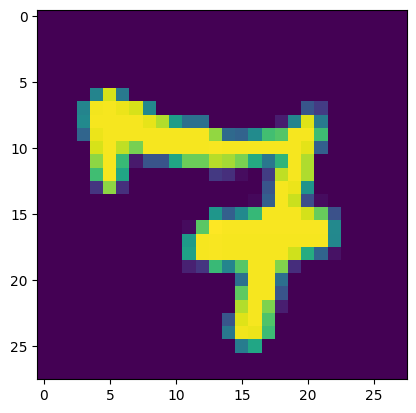

In [43]:
import matplotlib.pyplot as plt
plt.imshow(X[7].view(28, 28))
plt.show()

In [45]:
print(torch.argmax(net(X[7].view(-1, 784))[0]))

tensor(7)
